In [25]:
# importing libraries and making data frame from csv file
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set(color_codes=True)

players = pd.read_csv("Players.csv")
ssc = pd.read_csv('SSC.csv')

In [2]:
#check for nulls
ssc.isnull().sum()

Year      0
Player    0
Pos       0
Age       0
Tm        0
G         0
MP        0
PER       0
TS%       0
3PAr      0
FTr       0
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      0
USG%      0
OWS       0
DWS       0
WS        0
WS/48     0
OBPM      0
DBPM      0
BPM       0
VORP      0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [3]:
#check for nulls
players.isnull().sum()

Index            0
Player           0
height           0
weight           0
collage        348
born             0
birth_city     469
birth_state    482
dtype: int64

In [24]:
# checking data columns
players.head()

,Index,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180,77,Indiana University,1918,NaN,NaN
1,1,Cliff Barker,188,83,University of Kentucky,1921,Yorktown,Indiana
2,2,Leo Barnhorst,193,86,University of Notre Dame,1924,NaN,NaN
3,3,Ed Bartels,196,88,North Carolina State University,1925,NaN,NaN
4,4,Ralph Beard,178,79,University of Kentucky,1927,Hardinsburg,Kentucky


In [5]:
# Replace null for college 
players['collage'].fillna('No College', inplace = True)

In [6]:
ssc.describe()

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,18518.000000,18518.000000,18518.000000,18518.000000,18518.000000,18518.000000,18518.000000,18518.000000,18518.000000,18518.000000,...,18518.000000,18518.000000,18518.000000,18518.000000,18518.000000,18518.000000,18518.000000,18518.000000,18518.000000,18518.000000
mean,2001.380117,26.764661,49.206394,1163.295280,12.506135,0.504254,0.169930,0.314756,6.097921,13.856745,...,0.691803,59.843558,145.647208,205.490766,111.193487,38.801112,24.394697,72.270980,107.496544,491.184469
std,11.292776,4.034618,27.073209,929.831095,6.490797,0.104569,0.197101,0.235333,5.069410,6.797526,...,0.206221,66.318966,144.278312,204.684573,138.384001,38.124657,36.572065,67.135555,81.140070,486.132348
min,1980.000000,18.000000,1.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,24.000000,25.000000,301.000000,9.700000,0.474000,0.005000,0.193000,2.400000,9.000000,...,0.641000,11.000000,32.000000,45.000000,16.000000,8.000000,3.000000,17.000000,34.000000,92.000000
50%,2002.000000,26.000000,54.000000,987.000000,12.800000,0.519000,0.075000,0.283000,5.200000,12.900000,...,0.743000,36.000000,106.000000,146.000000,61.000000,28.000000,11.000000,54.000000,98.000000,341.000000
75%,2011.000000,29.000000,75.000000,1912.000000,15.800000,0.555000,0.307000,0.391000,8.900000,18.175000,...,0.811000,87.000000,212.000000,298.000000,153.000000,59.000000,30.000000,110.000000,169.000000,760.000000
max,2019.000000,44.000000,82.000000,3533.000000,133.800000,1.500000,1.000000,6.000000,100.000000,100.000000,...,1.000000,573.000000,1007.000000,1530.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,3041.000000


In [9]:
ssc['ppg'] = ssc.PTS/ssc.G

In [11]:
ppg = pd.DataFrame()
ppg['player'] = ssc.groupby('Player').mean()['ppg'].index
ppg['ppg'] = ssc.groupby('Player').mean()['ppg'].values
ppg['Games played'] = ssc.groupby('Player').sum()['G'].values
ppg['points'] = ssc.groupby('Player').mean()['PTS'].values
ppg = ppg.sort_values('ppg', ascending=False).head(10)
ppg

,player,ppg,Games played,points
2069,Michael Jordan*,29.444797,1072,2152.800000
1832,LeBron James,27.156870,1198,2033.937500
1710,Kevin Durant,26.886232,849,1911.666667
1067,George Gervin*,25.988089,547,2030.857143
76,Allen Iverson*,25.029824,914,1433.411765
1638,Karl Malone*,24.682985,1476,1943.578947
838,Dominique Wilkins*,24.239285,1074,1666.750000
1286,James Harden,24.220056,765,1862.700000
1755,Kobe Bryant,24.207550,1346,1682.150000
1804,Larry Bird*,23.754874,897,1676.230769


C:\Users\Amanu\.virtualenvs\Tekle_Amanuel_Capstone2-w0N8gz-z\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ppg', ylabel='Density'>

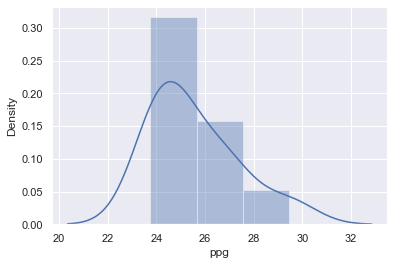

In [20]:
sns.distplot(ppg['ppg'])

The distribution of 3 point attempts is heavily skewed to the right with a mean of 67.71746408899449 and a std of 107.71339163069169


array([[<AxesSubplot:title={'center':'3PA'}>]], dtype=object)

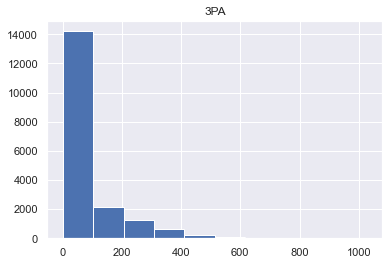

In [40]:
# The distribution of 3 point attempt is heaily skewed to the right
# print(ssc['3PA'].mean())
# print(np.std(ssc['3PA']))

print('The distribution of 3 point attempts is heavily skewed to the right with a mean of ' + str(ssc['3PA'].mean()) + ' and a std of ' + str(np.std(ssc['3PA'])))
ssc.hist('3PA')

In [38]:
# Distribution check for WS
print(ssc['WS'].mean())
print(np.std(ssc['WS']))

2.457733016524463
2.9940646512688445


array([[<AxesSubplot:title={'center':'WS'}>]], dtype=object)

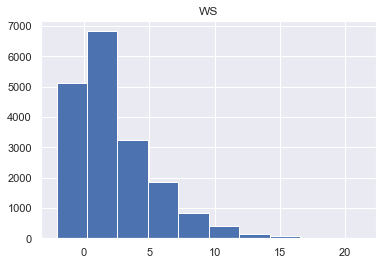

In [23]:
ssc.hist('WS')

          3PA        WS
3PA  1.000000  0.421727
WS   0.421727  1.000000


<AxesSubplot:>

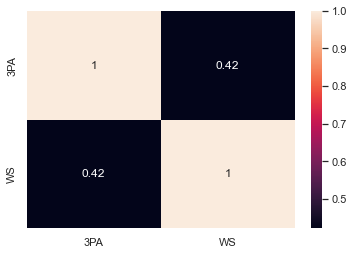

In [13]:
num_col = ['3PA','WS']
corr_matrix = ssc.loc[:,num_col].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)

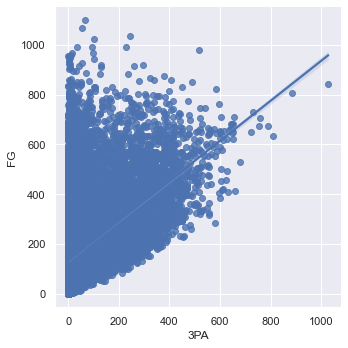

In [15]:
sns.lmplot(x='3PA', y='FG', data=ssc)